In [ ]:
import numpy as np

# dielectric constant of ZnTe 
# Constants
f_TO= 5.32e12
omega_TO = 2 * np.pi * f_TO # resonance frequency in Hz

epsilon_el = 7.44  # static dielectric constant
epsilon_st = 2.58  # oscillator strength

gamma = 2 * np.pi * 0.011e12  # linewidth in Hz
frequency_range = np.linspace(0.1e12, 10e12, 10000)  # frequency range in Hz
omega_range = frequency_range* 2* np.pi 

wavelength = 3e8 / frequency_range #* 1e6   # wavelength in micron meter  


# Calculate dielectric function
epsilon = epsilon_el + (epsilon_st * omega_TO**2) / (omega_TO**2 - omega_range **2 + 2j * gamma * omega_range )
relat_ampl =np.abs((epsilon-epsilon_el)/(epsilon_st * omega_TO**2))

# Calculate refractive index and absorption coefficient
n = np.sqrt((epsilon.real + np.sqrt(epsilon.real**2 + epsilon.imag**2)) / 2)
kappa = np.sqrt((np.sqrt(epsilon.real**2 + epsilon.imag**2) - epsilon.real) / 2)

alpha = (4*np.pi*kappa /wavelength) *1e-2       # The power absorption coefficient [cm^-1]
# Save data to text file
data = np.column_stack((omega_range , n, kappa, alpha))
data2 = np.column_stack((wavelength, epsilon.real, np.abs(epsilon.imag)))

np.savetxt('refractive_index_and_absorption.txt', data, delimiter='\t', \
            fmt='%.8e', comments='')                                       #header='Frequency (Hz)\ tn\ tkappa',

np.savetxt('permittivity_real_and_imaginary.txt', data2, delimiter='\t', \
           fmt='%.8e', comments='')    #  header='wavelength (MHz)\ real\ imaginary',

print("Data saved successfully.")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from text file
data = np.loadtxt('refractive_index_and_absorption.txt', delimiter='\t')    # 
data2 = np.loadtxt('permittivity_real_and_imaginary.txt', delimiter='\t')
# Extract angular frequency, refractive index, and absorption coefficient
omega = data[:, 0]/1e12
frequency = omega/(2*np.pi)
wavelength = data2[:, 0]   # Converting wavelength from m to mm
n = data[:, 1]
kappa = data[:, 2]
alpha  = data[:, 3]
epsilon_re = data2[:, 1]
epsilon_im = data2[:, 2]

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(9, 5))

# Plotting refractive index
axs[0, 0].plot(frequency, n, label='Refractive Index (n)', color='blue')  # /(2* np.pi)
axs[0, 0].set_xlabel('Frequency (THz)')
axs[0, 0].set_ylabel('Refractive Index (n)')
axs[0, 0].set_title('Refractive Index vs Frequency')
axs[0, 0].grid(True)
#axs[0, 0].set_yticks([3.16, 5.5])

# Plotting real epsilon
# axs[0, 1].plot(wavelength, epsilon_re, label='Re[$\epsilon$]', color='black')
# axs[0, 1].set_xlabel('Wavelength ($\mu$m)')
# axs[0, 1].set_ylabel('Re[$\epsilon]$ ($\epsilon_r$)')
# axs[0, 1].set_title('Re[$\epsilon$] vs Wavelength')
# axs[0, 1].grid(True)

# Plotting absorption coefficient
axs[1, 0].plot(frequency, alpha, label='The power absorption coefficient ($\epsilon$)', color='red') #/(2*np.pi)
axs[1, 0].set_xlabel('Frequency (THz)')
axs[1, 0].set_ylabel(r'The power absorption coefficient ($\alpha$)') #
axs[1, 0].set_title('Absorption Coefficient vs Frequency')
axs[1, 0].grid(True)

"""
# Plotting absorption coefficient
axs[1, 0].plot(omega_range , kappa, label='Absorption Coefficient ($\epsilon]$)', color='red')
axs[1, 0].set_xlabel('Frequency (THz)')
axs[1, 0].set_ylabel('Absorption Coefficient ($\kappa$)')
axs[1, 0].set_title('Absorption Coefficient vs Frequency')
axs[1, 0].grid(True)

"""

axs[0, 1].plot(frequency , relat_ampl, label='relative amplitude', color='red')
axs[0, 1].set_xlabel('Frequency (THz)')
axs[0, 1].set_ylabel('Absorption Coefficient ($\kappa$)')

#axs[0, 1].set_yscale('log')

axs[0, 1].set_title('relative amplitude')
axs[0, 1].grid(True)

# Plotting imaginary epsilon
# axs[1, 1].plot(wavelength, ((epsilon_im)), label='Absorption Coefficient ($\kappa$)', color='brown')
# axs[1, 1].set_xlabel('Wavelength ($\mu$m)')
# axs[1, 1].set_ylabel('Imaginary epsilon ($\epsilon_i$)')
# axs[1, 1].set_title('Im[$\epsilon$] vs Wavelength')
# axs[1, 1].grid(True)


plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
chi_E = 139  # Electric susceptibility (pm/V)
C_1 = -0.07  # Constant (pm/V)
omega_1 = 2 * np.pi * 5.3e12  # Characteristic frequency (Hz)
gamma_1 = 2 * np.pi * 0.09e12  # Linewidth (Hz)
frequency_range = np.linspace(0, 14e12, 1000) *(2* np.pi)  # frequency range in Hz

# Calculate magnitude of second-order nonlinear susceptibility
chi_36 = chi_E + (omega_1**2 * chi_E * C_1) / (omega_1**2 + 1j * gamma_1 * frequency_range - frequency_range**2)

# Convert magnitude to picometers per volt (pm/V)
chi_36_pm =  np.abs(chi_36) #* 1e12

# Plot
plt.figure(figsize=(10, 6))
plt.plot(frequency_range / (2*np.pi*1e12),chi_36_pm, color='red')
plt.xlabel('Frequency (THz)')
plt.ylabel('Magnitude of $\\chi^{(2)}$ (pm/V)')
plt.xticks([2,4,5.1,6,8,10], rotation= 0)
plt.title('Magnitude of $\\chi^{(2)}$ vs Frequency')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Constants
x = 1.5e-6   # thickness of ZnTe 0.5 um
omega_0 = 2 * np.pi * 6.3e12  # Reference frequency (Hz)
c = 3e8  # Speed of light (m/s)

# values for secon-order susceptibility
chi_E = 139  # Electric susceptibility (pm/V)
C_1 = -0.07  # Constant (pm/V)
omega_p = 2 * np.pi * 5.3e12  # Characteristic frequency (Hz) Plasma frequency (rad/s) 1e14 t0 1e16
gamma = 2 * np.pi * 0.09e12  # Linewidth (Hz) Scattering rate (rad/s) 1e11 t0 1e13

mu_0 = 4*np.pi * 1e-7 

epsilon_el = 7.44  # static dielectric constant
epsilon_st = 2.58  # oscillator strength
#gamma = 2 * np.pi * 0.011e12  # linewidth in Hz
frequency_range = np.linspace(0.1e12, 10e12, 10000)  # frequency range in Hz
omega_range = frequency_range * 2 * np.pi 
wavelength = 3e8 / frequency_range  # wavelength in micron meter


# paramaters for calculating cunductivity
n_e = 1e18  # Number density of charge carriers (e.g., 1e18 m^-3)
e = 1.602e-19  # Elementary charge (C)
m_e = 9.1093e-31      # the electron rest mass
m_star = 0.25 * m_e  # Effective mass of charge carriers (e.g., 0.25 * m_e)
sigma_bg = 1e-4  # Background conductivity (S/m) 1e-4 to 1e2

# Laser Parameters
I_m = 1e8  # Peak laser intensity
tau = 64e-15  # Pulse duration (s)

# Calculate dielectric function
epsilon = epsilon_el + (epsilon_st * omega_p**2) / (omega_p**2 - omega_range**2 + 2j * gamma * omega_range)
#relat_ampl = np.abs((epsilon - epsilon_el) / (epsilon_st * omega_TO**2))

# Calculate refractive index and absorption coefficient
n = np.sqrt((epsilon.real + np.sqrt(epsilon.real**2 + epsilon.imag**2)) / 2)
kappa = np.sqrt((np.sqrt(epsilon.real**2 + epsilon.imag**2) - epsilon.real) / 2)

# Optical group velocity index
def optical_group_velocity_index(omega):
    dn_domega = np.gradient(n, omega)
    n_g = n + omega * dn_domega
    return n_g


# Function to calculate conductivity
def conductivity(omega):
    sigma = (n_e * e**2 / m_star) * (omega_p**2 / (omega**2 + 1j * omega * gamma)) + sigma_bg
    return sigma


# Function to calculate absorption coefficient
def absorption_coefficient(omega):
    n_omega = n[np.argmin(np.abs(omega_range - omega))]  # Number density at omega (use appropriate method to get the value)
    alpha_T = (mu_0 * 3e8 / n_omega) * np.real(conductivity(omega))  # Assuming mu_0 is the permeability of free space
    return alpha_T

# Function to calculate second-order susceptibility as a function of omega
def second_order_susceptibility(omega):
    chi_36 = chi_E + (omega_p**2 * chi_E * C_1) / (omega_p**2 + 1j * gamma * omega - omega**2)
    return chi_36

# Laser Intensity Function
def laser_intensity(omega, x):
    alpha_0 = absorption_coefficient(omega_0)  # Absorption coefficient at omega_0
    n_g = optical_group_velocity_index(omega_0)
    intensity = I_m * tau * np.exp(-0.5 * (tau * omega)**2) * np.exp(1j * (omega * n_g / 3e8) * x) * np.exp(-alpha_0 * x)
    return intensity

# Nonlinear Polarization Function
def nonlinear_polarization(omega):
    chi_OR = second_order_susceptibility(omega)  # Calculate susceptibility at omega 
    n_omega_0 = n[np.argmin(np.abs(omega_range - omega_0))]  # Refractive index at omega_0
    alpha_T_omega = absorption_coefficient(omega)  # Calculate THz absorption coefficient at omega
    I_omega = laser_intensity(omega, x)  # Calculate laser intensity at omega
    polarization = chi_OR / (n_omega_0 * 3e8) * I_omega
    return polarization

# Frequency range
#omega_range = np.linspace(0.1e12, 15e12, 1000) * 2 * np.pi  # Frequency range (Hz)

# Calculate nonlinear polarization
P_OR = nonlinear_polarization(omega_range)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(omega_range , np.abs(P_OR), color='blue')
plt.xlabel('Angular Frequency $\omega$(Hz)')
plt.ylabel('Polarization (arb. units)')
plt.title('Nonlinear Polarization vs. Frequency')
plt.grid(True)
plt.show()

# Main

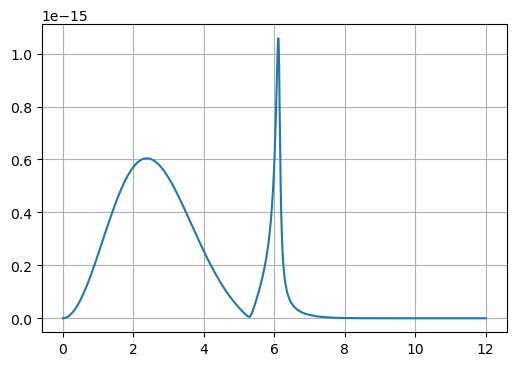

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# Constants
x_thick = [0.1e-6 , 0.2e-6 , 0.5e-6 ,0.8e-6 , 1e-6 ]  # thickness of ZnTe 0.5 um
c = 3e8  # Speed of light (m/s)
mu_0 = 4*np.pi * 1e-7 
#==============================================
# values for secon-order susceptibility
chi_E = 139e-12  # Electric susceptibility (pm/V)
C_1 = -0.07e-12  # Constant (pm/V)
omega_p = 2 * np.pi * 5.3e12  # Characteristic frequency (Hz) Plasma frequency (rad/s) 
gamma = 2 * np.pi * 0.09e12  # Linewidth (Hz) Scattering rate (rad/s) 
#==============================================
epsilon_el = 7.44  # static dielectric constant
epsilon_st = 2.58  # oscillator strength
frequency_range = np.linspace(0.01e12, 12e12, 10000)  # frequency range in Hz
omega_range = frequency_range * 2 * np.pi 
wavelength = c / frequency_range  # wavelength i
#==============================================
# paramaters for calculating cunductivity
n_e = 1e18  # Number density of charge carriers (e.g., 1e18 m^-3)
e = 1.602e-19  # Elementary charge (C)
m_e = 9.1093e-31      # the electron rest mass
m_star = 0.25 * m_e  # Effective mass of charge carriers (e.g., 0.25 * m_e)
sigma_bg = 1e-4  # Background conductivity (S/m) 1e-4 to 1e2
#==============================================
# Laser Parameters
omega_0 = 2 * np.pi * 2.6e12  # Reference frequency (Hz) or laser pulse 
omega_prime = 1.1 * omega_0  #  omega_prime is a value close to omega_0
I_m = 1e16  # Peak laser intensity
tau = 64e-15  # Pulse duration (s)
#==============================================
#==============================================
# Calculate dielectric function
def dielectric_fun(omega):
    epsilon = epsilon_el + (epsilon_st * omega_p**2) / (omega_p**2 - omega**2 + 1j * gamma * omega)
    return epsilon

# Calculate refractive index and absorption coefficient
def refractive_index(omega):
    epsilon = (dielectric_fun(omega))
    n =  np.sqrt(epsilon)
    return n 
#**************************
def dn_domega(omega):
    # Use central difference for numerical differentiation
    delta_omega = 1e-6  # small frequency difference
    n_plus =  refractive_index(omega + delta_omega)
    n_minus =  refractive_index(omega - delta_omega)
    derivative = (n_plus - n_minus) / (2 * delta_omega)
    return derivative

# Calculate group velocity
def group_index(omega):
    n_omega = refractive_index(omega)  #refractive(omega_0)
    n_g = n_omega + omega * dn_domega(omega)
    return n_g

# Calculate group index
def group_index1(omega):
    n = refractive_index(omega)
    dn_domega = np.gradient(n, omega)
    n_g = n + omega * np.array(dn_domega)
    return n_g

#**************************

def chi_2(omega):
    chi2 = chi_E + (omega_p**2 * chi_E * C_1) / (omega_p**2 - (omega- omega_prime)**2 + 1j * gamma * (omega-omega_prime))
    return chi2

def conduct_real(omega):
    sigma1 = (omega *dielectric_fun(omega).imag)/(4*np.pi)
    return sigma1

def conduct_imag(omega):
    sigma2 =  omega *(1-dielectric_fun(omega).real)/(4*np.pi)
    return sigma2

def conductivity(omega):
    sigma = conduct_real(omega) + 1j*conduct_imag(omega)
    return sigma
# Function to calculate absorption coefficient
def absorption_coefficient1(omega):       # note that n(omega)**2 = epsilon(omega)
    alpha_T1 = mu_0*c/refractive_index(omega) * conductivity(omega)
    return alpha_T1
# Function to calculate absorption coefficient
def absorption_coefficient2(omega):
    n2 = refractive_index(omega).imag
    alpha_T2 = (2*omega* n2)/c # Assuming mu_0 is the permeability of free space
    return alpha_T2
# Laser Intensity Function
def laser_intensity(omega):
    intensity = I_m * tau * np.exp(-0.5 * (tau * omega)**2) 
    return intensity

#  calculating the spectrum 
def E_field(omega, x):
    I_0 = laser_intensity(omega)
    chi2= chi_2(omega)
    n_omega = refractive_index(omega)
    n_omega_0= refractive_index(omega_0)
    n_g = group_index(omega)
    n_g_0 = group_index(omega_0)
    
    alpha_T =absorption_coefficient2(omega)     
    alpha_T_0 =absorption_coefficient2(omega_0)

    e_ix = np.exp(-1j*n_omega * omega * x/c) 
    e_at = np.exp(-alpha_T*x/2)                
    e_ax = np.exp(-alpha_T_0*x)             
    e_ing = np.exp(-1j*omega*n_omega*x/c)

    E_x = ( mu_0 *chi2*omega*I_0 ) / ( n_omega_0*(c/omega *(0.5*alpha_T + alpha_T_0)+1j*(n_omega + n_g) ))* \
         ( e_ix*e_at - e_ing *e_ax ) / ( 0.5*alpha_T - alpha_T_0 + 1j*omega/c *(n_omega - n_g) )

    return np.abs(E_x)**2

plt.figure(figsize=(6,4))
plt.plot(frequency_range/1e12,  E_field(omega_range, x_thick[2]))
plt.grid(True)
plt.show()

next

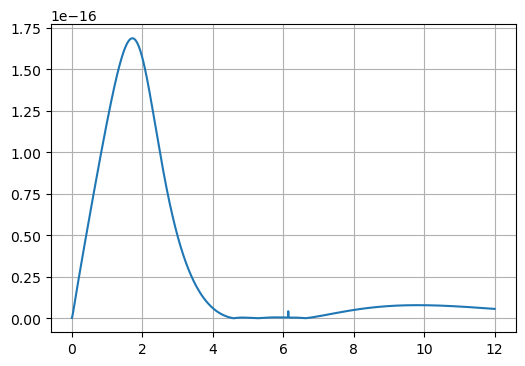

In [52]:
import numpy as np
import matplotlib.pyplot as plt
# Constants
x_thick = [0.1e-6 , 0.2e-6 , 0.5e-6 ,0.8e-6 , 1e-6 ]  # thickness of ZnTe 0.5 um
c = 3e8  # Speed of light (m/s)
mu_0 = 4*np.pi * 1e-7 
#==============================================
# values for secon-order susceptibility
chi_E = 139e-12  # Electric susceptibility (pm/V)
C_1 = -0.07e-12  # Constant (pm/V)
omega_p = 2 * np.pi * 5.3e12  # Characteristic frequency (Hz) Plasma frequency (rad/s) 
gamma = 2 * np.pi * 0.09e12  # Linewidth (Hz) Scattering rate (rad/s) 
#==============================================
epsilon_el = 7.44  # static dielectric constant
epsilon_st = 2.58  # oscillator strength
frequency_range = np.linspace(0.01e12, 12e12, 10000)  # frequency range in Hz
omega_range = frequency_range * 2 * np.pi 
wavelength = c / frequency_range  # wavelength i
#==============================================
# paramaters for calculating cunductivity
n_e = 1e18  # Number density of charge carriers (e.g., 1e18 m^-3)
e = 1.602e-19  # Elementary charge (C)
m_e = 9.1093e-31      # the electron rest mass
m_star = 0.25 * m_e  # Effective mass of charge carriers (e.g., 0.25 * m_e)
sigma_bg = 1e-4  # Background conductivity (S/m) 1e-4 to 1e2
#==============================================
# Laser Parameters
omega_0 = 2 * np.pi * 4.3e12  # Reference frequency (Hz) or laser pulse 
omega_prime = 1.1 * omega_0  #  omega_prime is a value close to omega_0
I_m = 1e8  # Peak laser intensity
tau = 34e-15  # Pulse duration (s)
#==============================================
#==============================================
# Calculate dielectric function
def dielectric_fun(omega):
    epsilon = epsilon_el + (epsilon_st * omega_p**2) / (omega_p**2 - omega**2 - 1j * gamma * omega)
    return epsilon

# Calculate refractive index and absorption coefficient
def refractive_index(omega):
    epsilon = (dielectric_fun(omega))
    n =  np.sqrt(epsilon)
    return n 
#=========================================
#*****************************************

# Calculate group index
def group_index(omega):
    n = refractive_index(omega)
    dn_domega = np.gradient(n, omega)
    n_g = n + omega * np.array(dn_domega)
    return n_g


#============================================
#********************************************
def chi_2(omega):
    chi2 = chi_E + (omega_p**2 * chi_E * C_1) / (omega_p**2 - (omega- omega_prime)**2+ 1j * gamma * (omega-omega_prime))
    return chi2

def conduct_real(omega):
    sigma1 = (omega *dielectric_fun(omega).imag)/(4*np.pi)
    return sigma1

def conduct_imag(omega):
    sigma2 =  omega *(1-dielectric_fun(omega).real)/(4*np.pi)
    return sigma2

def conductivity(omega):
    sigma = conduct_real(omega) + 1j*conduct_imag(omega)
    return sigma
# Function to calculate absorption coefficient
def absorption_coefficient1(omega):       # note that n(omega)**2 = epsilon(omega)
    alpha_T1 = mu_0*c/np.sqrt(dielectric_fun(omega)) * conductivity(omega)
    return alpha_T1
# Function to calculate absorption coefficient
def absorption_coefficient2(omega):
    n2 = dielectric_fun(omega).imag/(2*np.sqrt(np.abs(dielectric_fun(omega).real)))
    alpha_T2 = (2*omega* n2)/c # Assuming mu_0 is the permeability of free space
    return alpha_T2
# Laser Intensity Function
def laser_intensity(omega):
    intensity = I_m * tau * np.exp(-0.5 * (tau * omega)**2) 
    return intensity

#  calculating the spectrum 
def E_field(omega, x):
    I_0 = laser_intensity(omega)
    chi2= chi_2(omega)
    n_omega = refractive_index(omega)
    n_omega_0= refractive_index(omega_0)
    n_g = group_index(omega)
    n_g_0 = group_index(omega_0)
    
    alpha_T =absorption_coefficient2(omega)     
    alpha_T_0 =absorption_coefficient2(omega_0)

    e_ix = np.exp(-1j*n_omega * omega * x/c) 
    e_at = np.exp(-alpha_T*x/2)                
    e_ax = np.exp(-alpha_T_0*x)             
    e_ing = np.exp(-1j*omega*n_omega*x/c)

    E_x = ( mu_0 *chi2*omega*I_0 ) / ( n_omega_0*(c/omega *(0.5*alpha_T + alpha_T_0)+1j*(n_omega + n_g) ))* \
         ( e_ix*e_at - e_ing *e_ax ) / ( 0.5*alpha_T - alpha_T_0 + 1j*omega/c *(n_omega - n_g) )

    return np.abs(E_x)

plt.figure(figsize=(6, 4))
plt.plot(frequency_range/1e12,  E_field(omega_range, x_thick[3]))
plt.grid(True)
plt.show()

### optical group index $n_g(\omega)$

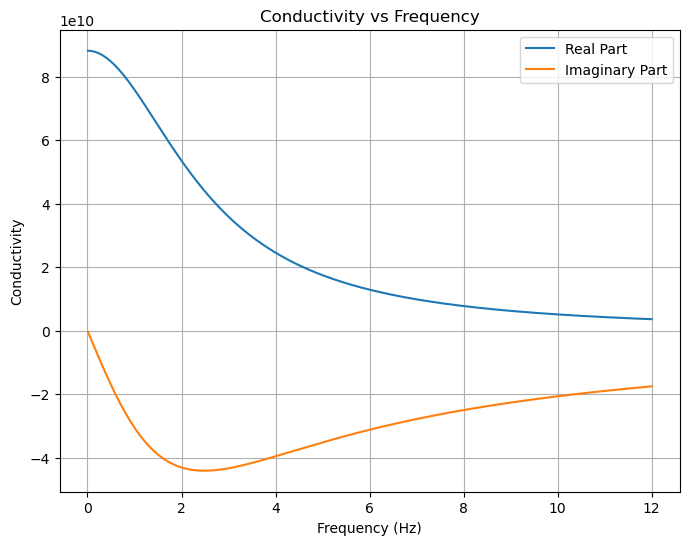

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
x_thick = [0.1e-6, 0.2e-6, 0.5e-6, 0.8e-6, 1e-6]  # Thickness of ZnTe (um)
c = 3e8  # Speed of light (m/s)
mu_0 = 4 * np.pi * 1e-7

# Material properties
epsilon_el = 7.44  # Static dielectric constant
epsilon_st = 2.58  # Oscillator strength
omega_p = 2 * np.pi * 5.3e12  # Characteristic frequency (rad/s)
gamma = 2 * np.pi * 0.09e12  # Linewidth (rad/s)
chi_E = 139e-12  # Electric susceptibility (pm/V)
C_1 = -0.07e-12  # Constant (pm/V)

# Carrier properties (combined for efficiency)
tau = 1e-15
n_e = 1e18  # Number density of charge carriers (m^-3)
e = 1.602e-19  # Elementary charge (C)
m_star = 0.25 * 9.1093e-31  # Effective mass (kg) (combined constants)
sigma_0 = tau * omega_p**2/(4*np.pi)  # 
sigma_00 = n_e * tau * e**2/m_star

# Laser parameters
omega_0 = 2 * np.pi * 2.6e12  # Reference frequency (rad/s)
omega_prime = 1.1 * omega_0
I_m = 1e16  # Peak laser intensity
tau = 64e-15  # Pulse duration (s)
# Calculate dielectric function
def chi_2(omega):
    return chi_E + (omega_p**2* chi_E * C_1) / (omega_p**2 - (omega- omega_prime)**2+ 1j * gamma * (omega-omega_prime))
# Functions (combined and simplified)
def dielectric_fun(omega):
    return epsilon_el + (epsilon_st * omega_p**2) / (omega_p**2 - omega**2 + 1j * gamma * omega)


def refractive_index(omega):
    return np.sqrt(dielectric_fun(omega))

# Calculate group index
#=========================================
#*****************************************

# Calculate group index
def group_index(omega):
    n = refractive_index(omega)
    dn_domega = np.gradient(n, omega)
    n_g = n + omega * np.array(dn_domega)
    return n_g


def dn_domega(omega):
    # Use central difference for numerical differentiation
#     delta_omega1 = 1e-6  # small frequency difference
    delta_omega = frequency_range[1] * 2 * np.pi - frequency_range[0] * 2 * np.pi 
    n_plus =  refractive_index(omega + delta_omega)
    n_minus =  refractive_index(omega - delta_omega)
    derivative = (n_plus - n_minus) / (2 * delta_omega)
    return derivative

# Calculate group velocity
def group_index1(omega):
    n_omega = refractive_index(omega)  #refractive(omega_0)
    n_g = n_omega + omega * dn_domega(omega)
    return n_g

#*****************
def conductivity1(omega):
    sigma1 = sigma_0/(1+1j*omega * tau)
    return sigma1

def conductivity(omega):
    sigma1 = omega *dielectric_fun(omega).imag/(4*np.pi)
    sigma2 =  omega *(1-dielectric_fun(omega).real)/(4*np.pi)
    sigma = sigma1 + 1j*sigma2
    return sigma
# Function to calculate absorption coefficient
def absorption_coefficient1(omega):       # note that n(omega)**2 = epsilon(omega)
    alpha_T1 = mu_0*c/refractive_index(omega) * conductivity(omega)
    return alpha_T1
# Function to calculate absorption coefficient

def absorption_coefficient2(omega):
    n = refractive_index(omega)
    return 2 * omega * n.imag / c
#============
#============================================
#********************************************
# Calculate and plot optical group index as a function of frequency
plt.figure(figsize=(8, 6))
# plt.plot(frequency_range/1e12, np.real(group_index(omega_range)), label='Real Part')
# plt.plot(frequency_range/1e12, np.imag(group_index(omega_range)), label='Imaginary Part')
plt.plot(frequency_range/1e12, np.real(conductivity1(omega_range)), label='Real Part')
plt.plot(frequency_range/1e12, np.imag(conductivity1(omega_range)), label='Imaginary Part')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Conductivity')
plt.title('Conductivity vs Frequency')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Optical Group Index')
# plt.title('Optical Group Index vs Frequency')
plt.legend()
plt.grid(True)
plt.show()


compare sigma_0 882473376393.373 0.001126937964497821


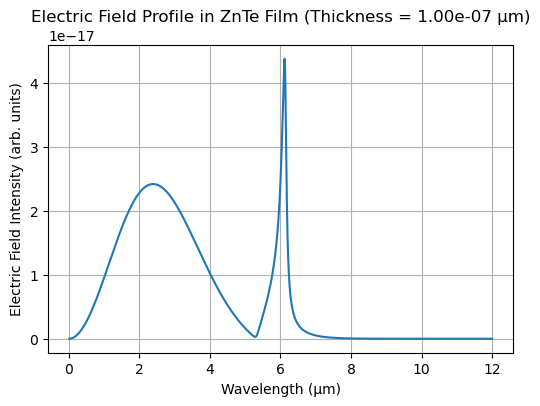

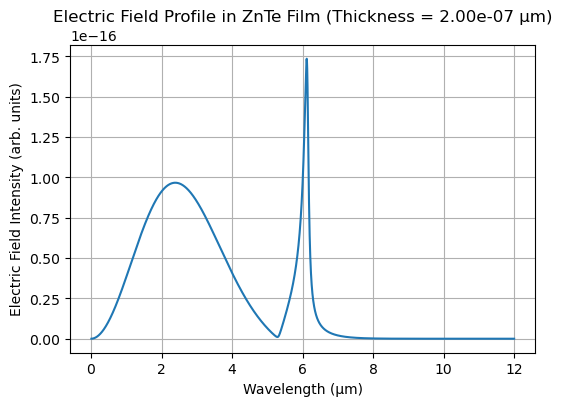

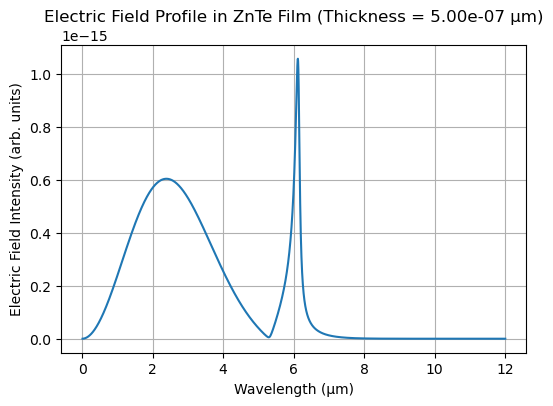

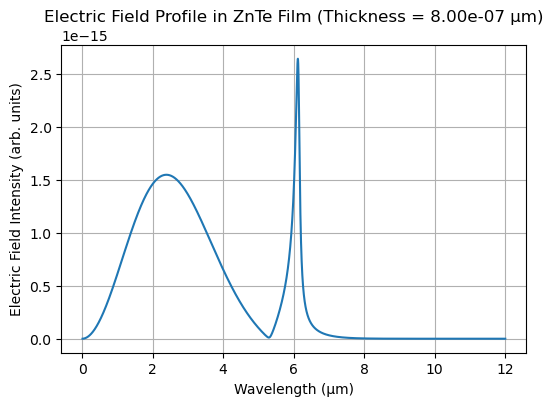

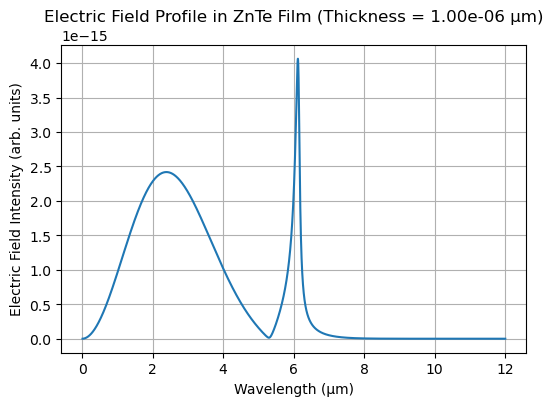

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
x_thick = [0.1e-6, 0.2e-6, 0.5e-6, 0.8e-6, 1e-6]  # Thickness of ZnTe (um)
c = 3e8  # Speed of light (m/s)
mu_0 = 4 * np.pi * 1e-7

# Material properties
epsilon_el = 7.44  # Static dielectric constant
epsilon_st = 2.58  # Oscillator strength
omega_p = 2 * np.pi * 5.3e12  # Characteristic frequency (rad/s)
gamma = 2 * np.pi * 0.09e12  # Linewidth (rad/s)
chi_E = 139e-12  # Electric susceptibility (pm/V)
C_1 = -0.07e-12  # Constant (pm/V)

# Carrier properties (combined for efficiency)
tau = 1e-14
n_e = 1e18  # Number density of charge carriers (m^-3)
e = 1.602e-19  # Elementary charge (C)
m_star = 0.25 * 9.1093e-31  # Effective mass (kg) (combined constants)
sigma_0 = tau * omega_p**2/(4*np.pi)  # 
sigma_00 = n_e * tau * e**2/m_star

print('compare sigma_0',sigma_0, sigma_00 )
# Laser parameters
omega_0 = 2 * np.pi * 2.6e12  # Reference frequency (rad/s)
omega_prime = 1.1 * omega_0
I_m = 1e16  # Peak laser intensity
tau = 64e-15  # Pulse duration (s)


def chi_2(omega):
    return chi_E + (omega_p**2* chi_E * C_1) / (omega_p**2 - omega**2+ 1j * gamma * omega)
def dielectric_fun(omega):
    return epsilon_el + (epsilon_st * omega_p**2) / (omega_p**2 - omega**2 + 1j * gamma * omega)


def refractive_index(omega):
    return np.sqrt(dielectric_fun(omega))

#*****************
def conductivity1(omega):
    sigma1 = omega *dielectric_fun(omega).imag/(4*np.pi)
    sigma2 =  omega *(1-dielectric_fun(omega).real)/(4*np.pi)
    sigma = sigma1 + 1j*sigma2
    return sigma

def conductivity2(omega):       # seems more accurate
    sigma = sigma_0/(1+1j*omega * tau)      ### + or - ??
    return sigma
# Function to calculate absorption coefficient
def absorption_coefficient1(omega):
    n = refractive_index(omega)
    return 2 * omega * n.imag / c

def absorption_coefficient2(omega):       # note that n(omega)**2 = epsilon(omega)
    alpha_T1 = mu_0*c/refractive_index(omega) * conductivity2(omega)
    return alpha_T1
#============
# Calculate group velocity
def group_index1(omega):
    # Use central difference for numerical differentiation
    delta_omega = 1e-6  # small frequency difference
    n_plus =  refractive_index(omega + delta_omega)
    n_minus =  refractive_index(omega - delta_omega)
    dn_domega = (n_plus - n_minus) / (2 * delta_omega)
    n_omega = refractive_index(omega)  #refractive(omega_0)
    n_g = n_omega + omega * dn_domega
    return n_g
def group_index2(omega):      # seems relaible
    n_omega = refractive_index(omega)
    dn_domega = np.gradient(n_omega, omega)
    return n_omega + omega * np.array(dn_domega)


def laser_intensity(omega):
    return I_m * tau * np.exp(-0.5 * (tau * omega)**2)


def E_field(omega, x):
    I_0 = laser_intensity(omega)
    chi2 = chi_2(omega- omega_prime)
    n_omega = refractive_index(omega)
    n_omega_0 = refractive_index(omega_0)
    n_g = group_index1(omega)
    n_g_0 = group_index1(omega_0)
    alpha_T = absorption_coefficient1(omega)
    alpha_T_0 = absorption_coefficient1(omega_0)

    e_ix = np.exp(-1j*n_omega * omega * x/c) 
    e_at = np.exp(-alpha_T*x/2)                
    e_ax = np.exp(-alpha_T_0*x)             
    e_ing = np.exp(-1j*omega*n_omega*x/c)

    E_x = ( mu_0 *chi2*omega*I_0 ) / ( n_omega_0*(c/omega *(0.5*alpha_T + alpha_T_0)+1j*(n_omega + n_g) ))* \
         ( e_ix*e_at - e_ing *e_ax ) / ( 0.5*alpha_T - alpha_T_0 + 1j*omega/c *(n_omega - n_g) )
    return np.abs(E_x)**2


# Calculations and plotting
frequency_range = np.linspace(0.01e12, 12e12, 10000)
omega_range = frequency_range * 2 * np.pi
wavelength = c / frequency_range

# Looping through different thicknesses (optional)
for thickness in x_thick:
    plt.figure(figsize=(6, 4))
    plt.plot(frequency_range / 1e12, E_field(omega_range, thickness))
    plt.xlabel("Wavelength (μm)")
    plt.ylabel("Electric Field Intensity (arb. units)")
    plt.grid(True)
    plt.title(f"Electric Field Profile in ZnTe Film (Thickness = {thickness:.2e} μm)")
    plt.show()

